In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import final as fn
%matplotlib inline

In [2]:
pitstops_file = fn.read_data("data/pit_stops.csv")

In [3]:
results_file = fn.read_data("data/results.csv")

In [4]:
races_file = fn.read_data("data/races.csv")

In [5]:
ten_year_circuit = fn.past_ten_year_circuit(races_file)

In [8]:
clean_result = fn.delete_data(results_file, "position", "\\N")

In [9]:
num_result = fn.turn_column_num(clean_result, "position")

In [10]:
total_pitstop = fn.get_total_pitstop(pitstops_file)

In [11]:
result_pitstop = fn.join_table(total_pitstop, num_result,["raceId","driverId"])

In [13]:
result_pitstop = fn.join_table(result_pitstop, races_file, ["raceId"])
ten_year_circuit_df = result_pitstop[result_pitstop["circuitId"].isin(ten_year_circuit)]
stop_pos_cir = ten_year_circuit_df[["stop", "position", "circuitId"]]

<AxesSubplot:title={'center':'position'}, xlabel='[stop]'>

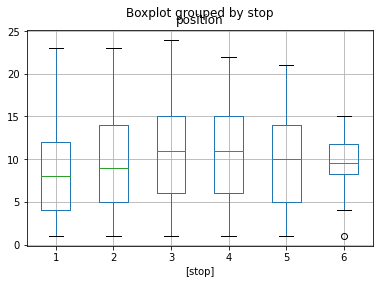

In [18]:
result_stop = result_pitstop[["stop", "position"]]
result_stop.boxplot(by="stop")

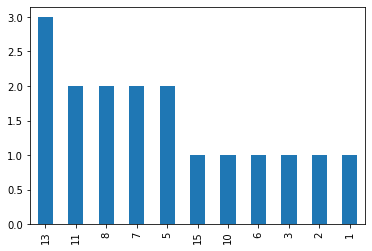

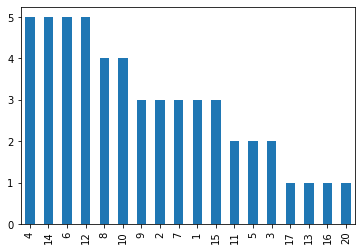

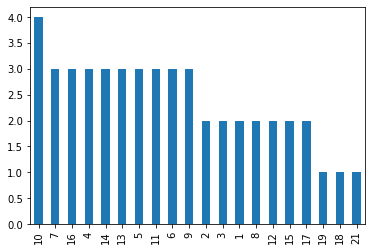

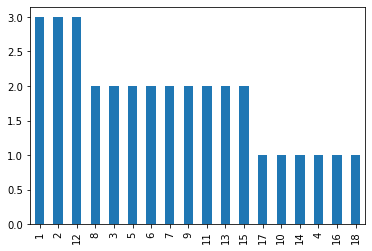

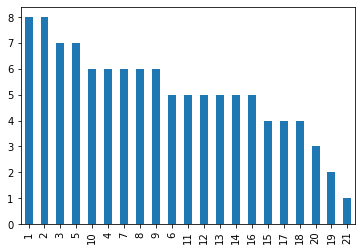

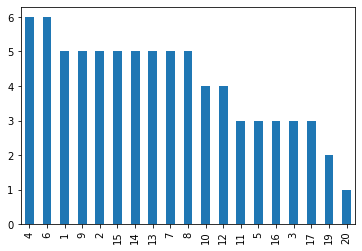

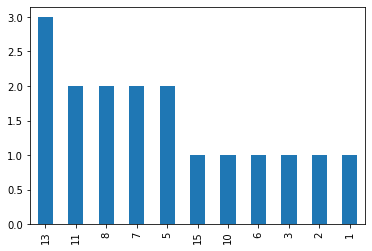

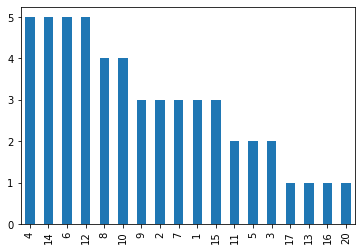

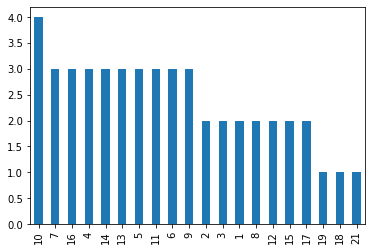

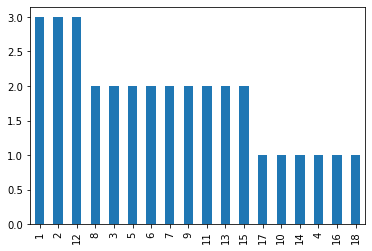

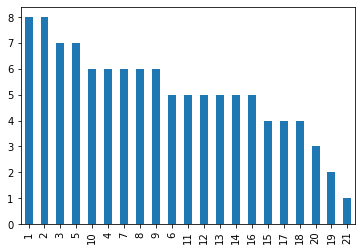

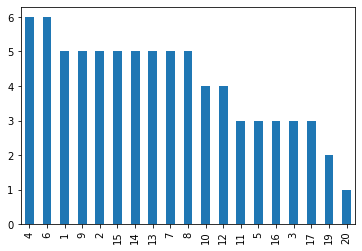

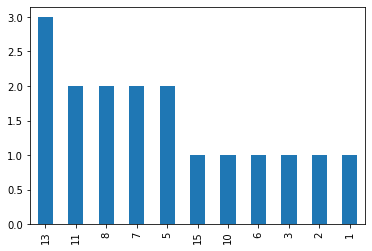

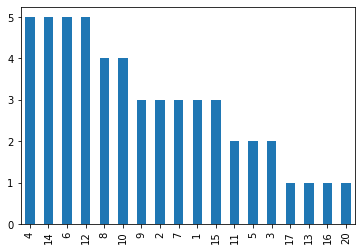

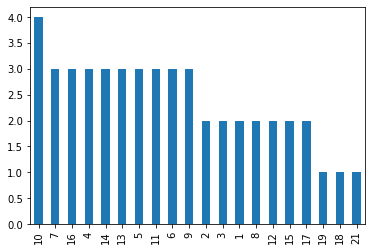

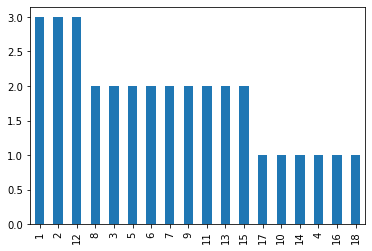

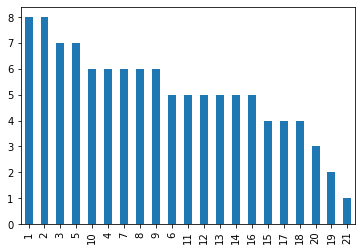

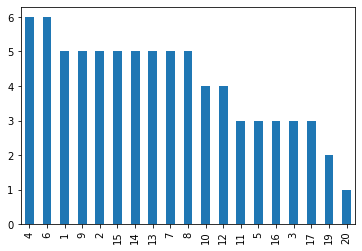

In [21]:
# 
for n in range(1,4):
    for i in ten_year_circuit:
        one_stop = stop_pos_cir.loc[(stop_pos_cir["stop"] == 1) & (stop_pos_cir["circuitId"] == int(i))]
        one_stop["position"].value_counts().plot.bar()
        plt.show()